# Standard RB Demo

This is a very basic implemention of a standard RB experiment

*NOTE: the circuit generation code of this demo is quite slow*

In [1]:
import numpy as np
import qiskit_experiments as qe
rb = qe.randomized_benchmarking

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Running 1-qubit RB

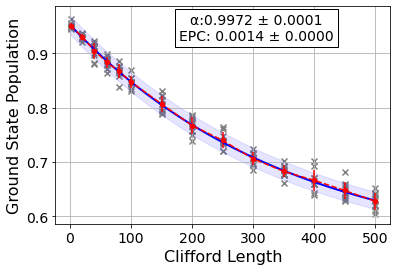

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: df033df1-7e8f-404f-b69f-2a6bd3512697
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.42821387 0.99719668 0.52398544]
- popt_err: [8.28192567e-03 9.56773121e-05 8.61004009e-03]
- pcov: [[ 6.85902928e-05  7.67352628e-07 -7.10546223e-05]
 [ 7.67352628e-07  9.15414806e-09 -8.07518155e-07]
 [-7.10546223e-05 -8.07518155e-07  7.41327903e-05]]
- chisq: 0.3873357020862374
- EPC: 0.0014016596412826376
- EPC_err: 4.797314010274888e-05
- plabels: ['A', 'alpha', 'B']

In [2]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed = 1010

# Run an RB experiment on qubit 0
exp1 = rb.RBExperiment([0], lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend)

# View result data
expdata1

## Running 2-qubit RB

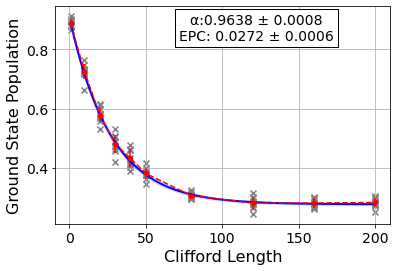

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: b82deede-bb0f-46c1-ace3-110eb75583ff
Status: COMPLETE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.63520235 0.96376144 0.27754806]
- popt_err: [0.00494661 0.00082492 0.00284417]
- pcov: [[ 2.44689156e-05 -9.15635531e-08 -5.86783072e-06]
 [-9.15635531e-08  6.80497572e-07 -1.56913622e-06]
 [-5.86783072e-06 -1.56913622e-06  8.08928454e-06]]
- chisq: 0.6815247498764024
- EPC: 0.027178919237521776
- EPC_err: 0.0006419556223575587
- plabels: ['A', 'alpha', 'B']

In [3]:
lengths = [1, 10, 20, 30, 40, 50, 80, 120, 160, 200]
num_samples = 10
seed = 1010

# Run an RB experiment on qubits 0,
exp2 = rb.RBExperiment([0, 1], lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend)

# View result data
expdata2

## Running parallel RB experiments

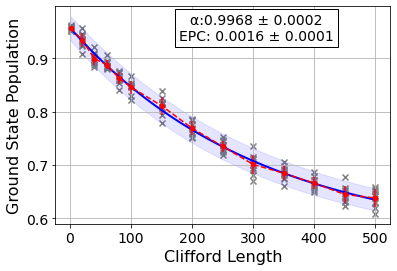

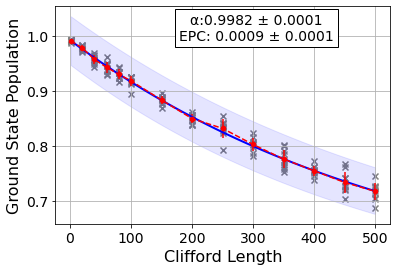

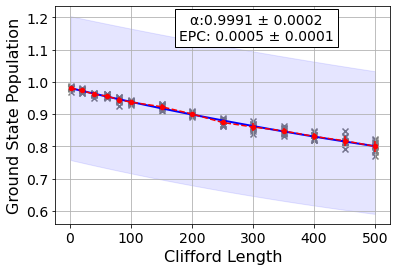

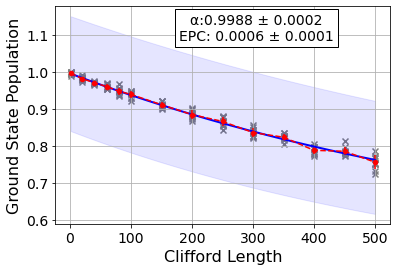

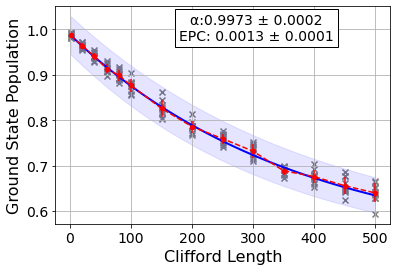

---------------------------------------------------
Experiment: ParallelExperiment
Experiment ID: 83f33210-ed95-4ef2-9c61-4954f180cbed
Status: COMPLETE
Component Experiments: 5
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment']
- experiment_ids: ['c499ed16-28e6-4267-8e8b-b47ac6934a43', '9ef8680d-1359-4bf0-984b-04101ca99359', 'b32ef592-45cf-4a1a-9274-96732a7d82fc', '6d23f354-f77c-495f-ac93-75968efdeb5f', '5e3a2985-b9cb-47ae-93ff-6535a7c4e30b']
- experiment_qubits: [(0,), (1,), (2,), (3,), (4,)]

In [4]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed1 = 1010

exps = [rb.RBExperiment([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in range(5)]

par_exp = qe.composite.ParallelExperiment(exps)
par_expdata = par_exp.run(backend)

# View result
par_expdata

#### Viewing sub experiment data

The experiment data returned from a batched experiment also contains individual experiment data for each sub experiment which can be accessed using `experiment_data(index)`

In [5]:
# Print sub-experiment data
for i in range(par_exp.num_experiments):
    print(par_expdata.component_experiment_data(i), '\n')

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: c499ed16-28e6-4267-8e8b-b47ac6934a43
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.40268982 0.99678295 0.55458117]
- popt_err: [0.01119684 0.00016527 0.0115669 ]
- pcov: [[ 1.25369241e-04  1.76469373e-06 -1.28726858e-04]
 [ 1.76469373e-06  2.73147278e-08 -1.85644787e-06]
 [-1.28726858e-04 -1.85644787e-06  1.33793247e-04]]
- chisq: 1.355339585369452
- EPC: 0.0016085225502482925
- EPC_err: 8.290254059480716e-05
- plabels: ['A', 'alpha', 'B'] 

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 9ef8680d-1359-4bf0-984b-04101ca99359
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.46503453 0.99821726 0.52723893]
- popt_err: [0.02207569 0.00011594 0.02223948]
- pcov: [[ 4.87335909e-04  2.5